## Noise revisited

In [1]:
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.9, 12)

np.set_printoptions(suppress=True, precision=5)

sns.set(font_scale=3.5)

from network import Protocol, NetworkManager, BCPNNPerfect, TimedInput
from connectivity_functions import create_orthogonal_canonical_representation, build_network_representation
from connectivity_functions import get_weights_from_probabilities, get_probabilities_from_network_representation
from connectivity_functions import create_matrix_from_sequences_representation, produce_overlaped_sequences
from analysis_functions import calculate_recall_time_quantities, get_weights
from analysis_functions import get_weights_collections
from plotting_functions import plot_network_activity_angle, plot_weight_matrix
from analysis_functions import calculate_angle_from_history, calculate_winning_pattern_from_distances
from analysis_functions import calculate_patterns_timings, calculate_recall_success_nr, calculate_T_persistence

epsilon = 10e-80

## An example

1.0
theo 0.12543720363
[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
CPU times: user 544 ms, sys: 0 ns, total: 544 ms
Wall time: 545 ms


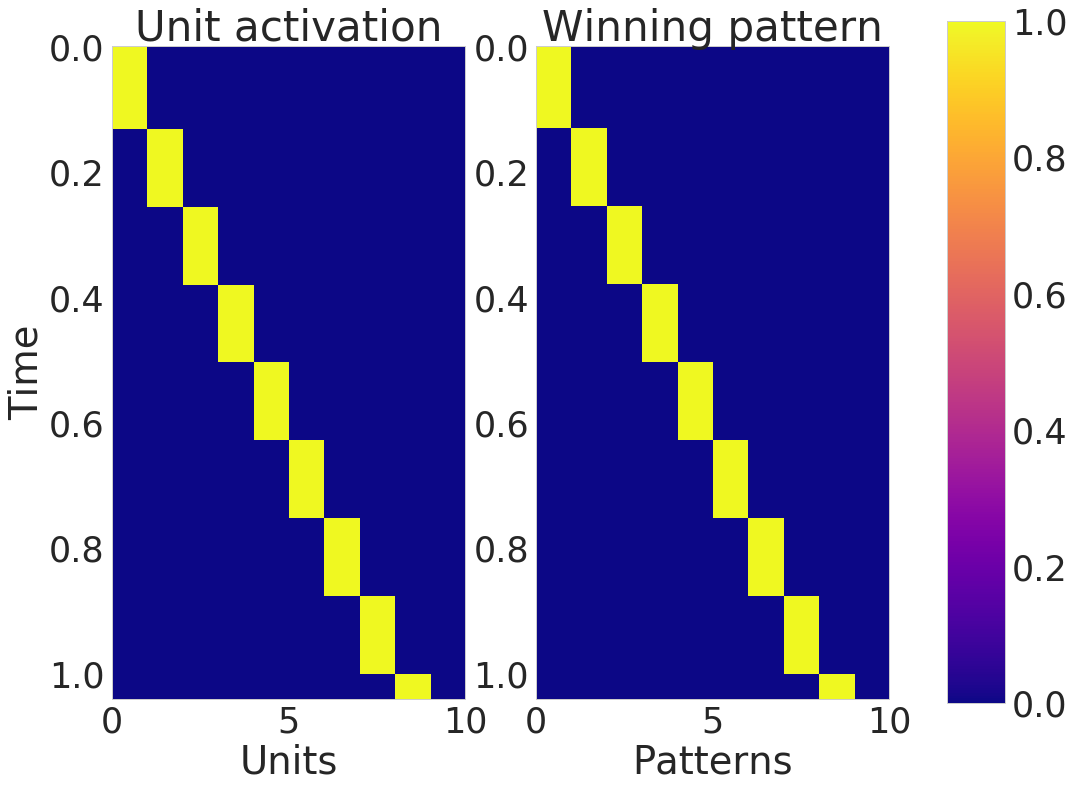

In [9]:
%%time
always_learning = False
strict_maximum = True
perfect = False
z_transfer = False
k_perfect = True
diagonal_zero = False
normalized_currents = True

g_w_ampa = 1.0
g_w = 0.0
g_a = 1.0
tau_a = 0.150
G = 1.0
sigma = 0.0
tau_m = 0.020
tau_z_pre_ampa = 0.050
tau_z_post_ampa = 0.025
tau_p = 10.0

hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o']

# Protocol
training_time = 0.100
inter_sequence_interval = 0.0

# Recall
T_cue = 0.020
T_recall = 1.0 + T_cue
n = 1
remove = 0.009

factor = 0.0

# Protocol
matrix = create_orthogonal_canonical_representation(minicolumns, hypercolumns)
seq = matrix[:n_patterns]
nr = build_network_representation(seq, minicolumns, hypercolumns)

n_connections = len(seq) - 1
value = 1.0
extension = 2
alpha = 0.5
weights = [value for i in range(n_connections)]
weights_collection = [weights]
sequences = [seq]
w = create_matrix_from_sequences_representation(minicolumns, hypercolumns, sequences, weights_collection,
                                                extension, alpha, w_min=-10.0)

# Neural Network
nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, tau_m=tau_m,
                  sigma=sigma, G=G, tau_z_pre_ampa=tau_z_pre_ampa, tau_z_post_ampa=tau_z_post_ampa, tau_p=tau_p,
                  z_transfer=z_transfer, diagonal_zero=diagonal_zero, strict_maximum=strict_maximum, 
                  perfect=perfect, k_perfect=k_perfect, always_learning=always_learning, 
                  normalized_currents=normalized_currents)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)


nn.w_ampa = w
aux, indexes = np.unique(nr, axis=0, return_index=True)
patterns_dic = {index:pattern for (index, pattern) in zip(indexes, aux)}
manager.patterns_dic = patterns_dic

# T persistence
w_tran = alpha 

# Noise
w_robust = 2 * alpha
current = 2  * g_w_ampa * w_robust
noise = factor * current
nn.sigma = noise


aux = calculate_recall_success_nr(manager, nr, T_recall, T_cue, debug=True, remove=remove)
s, timings, pattern_sequence = aux
T_persistence = [t[1] for t in timings[1:-1]]
T_persistence_theo = calculate_T_persistence(tau_a, g_w_ampa, w_tran, g_a, tau_m, perfect=perfect)
plot_network_activity_angle(manager)
print(s)
print('theo', T_persistence_theo)
pprint.pprint(T_persistence)
pprint.pprint(pattern_sequence)

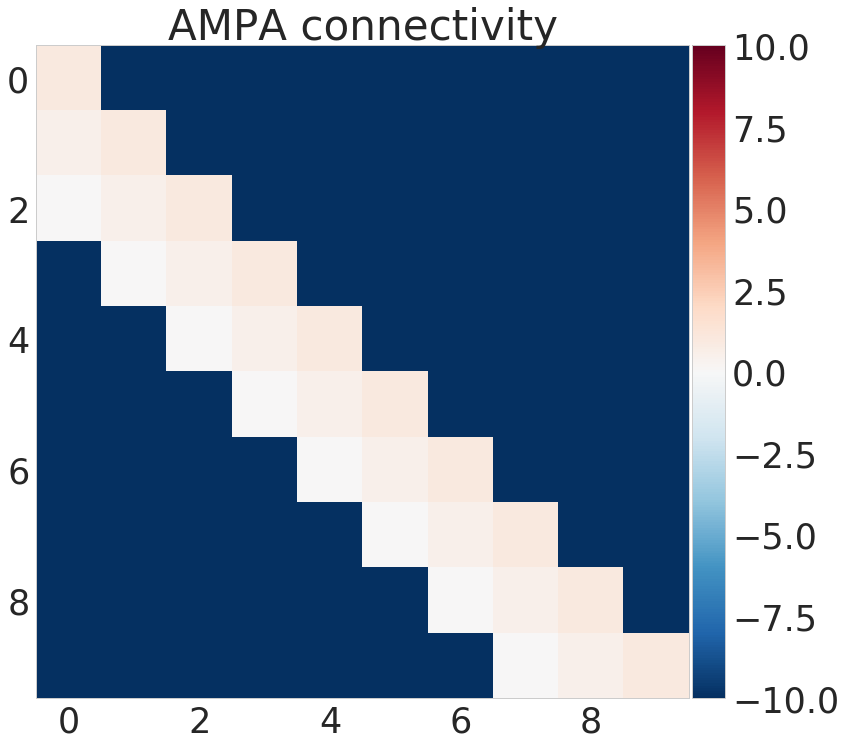

In [10]:
plot_weight_matrix(manager.nn, ampa=True)

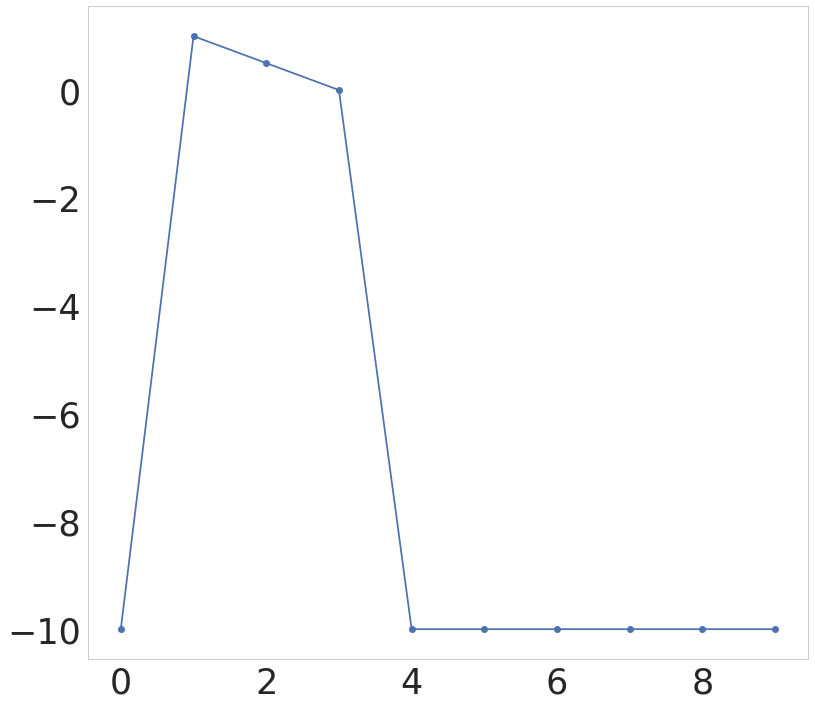

In [11]:
plt.plot(nn.w_ampa[:, 1], 'o-')

## Systematic
#### Test

In [90]:
%%time
always_learning = False
strict_maximum = True
perfect = False
z_transfer = False
k_perfect = True
diagonal_zero = False
normalized_currents = True

g_w_ampa = 1.0
g_w = 0.0
g_a = 1.0
tau_a = 0.100
G = 1.0
sigma = 0.0
tau_m = 0.010
tau_z_pre_ampa = 0.050
tau_z_post_ampa = 0.025
tau_p = 10.0

hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o']

# Recall
T_cue = 0.020
T_recall = 1.0 + T_cue
remove = 0.009

factor = 0.0

# Protocol
matrix = create_orthogonal_canonical_representation(minicolumns, hypercolumns)
seq = matrix[:n_patterns]
nr = build_network_representation(seq, minicolumns, hypercolumns)

n_connections = len(seq) - 1
value = 1.0
extension = 3
alpha = 0.5
weights = [value for i in range(n_connections)]
weights_collection = [weights]
sequences = [seq]
w = create_matrix_from_sequences_representation(minicolumns, hypercolumns, sequences, weights_collection,
                                                extension, alpha, w_min=-10.0)

# Neural Network
nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, tau_m=tau_m,
                  sigma=sigma, G=G, tau_z_pre_ampa=tau_z_pre_ampa, tau_z_post_ampa=tau_z_post_ampa, tau_p=tau_p,
                  z_transfer=z_transfer, diagonal_zero=diagonal_zero, strict_maximum=strict_maximum, 
                  perfect=perfect, k_perfect=k_perfect, always_learning=always_learning, 
                  normalized_currents=normalized_currents)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)


nn.w_ampa = w
aux, indexes = np.unique(nr, axis=0, return_index=True)
patterns_dic = {index:pattern for (index, pattern) in zip(indexes, aux)}
manager.patterns_dic = patterns_dic

# T persistence
w_tran = w[1, 1] - w[2, 1]

# Noise
num = 20
trials = 100
sigma_vector = np.linspace(0, 1.0, num=num)
successes = np.zeros((num, trials))
persistence_times = np.zeros((num, trials, n_patterns - 2))

w_robust = w[1, 1] - w[3, 1]
current = 2 * g_w_ampa * w_robust
T_persistence = calculate_T_persistence(tau_a, g_w_ampa, w_tran, g_a, tau_m, perfect=perfect)
T_recall = 1.2 * T_persistence * n_patterns + T_cue
print(T_persistence)

for sigma_index, factor in enumerate(sigma_vector):
    print(sigma_index, num)
    noise = factor * current
    nn.sigma = noise
    for trial_index in range(trials):
        aux = calculate_recall_success_nr(manager, nr, T_recall, T_cue, debug=True, remove=remove)
        s, timings, pattern_sequence = aux
        times = [t[1] for t in timings[1:-1]]
        n_aux = min((len(times), n_patterns - 2))
        successes[sigma_index, trial_index] = s
        persistence_times[sigma_index, trial_index, :n_aux] = np.array(times)[:n_aux]

0.0798507696218
0 20
1 20
2 20
3 20
4 20
5 20
6 20
7 20
8 20
9 20
10 20
11 20
12 20
13 20
14 20
15 20
16 20
17 20
18 20
19 20
CPU times: user 6min 56s, sys: 692 ms, total: 6min 57s
Wall time: 6min 57s


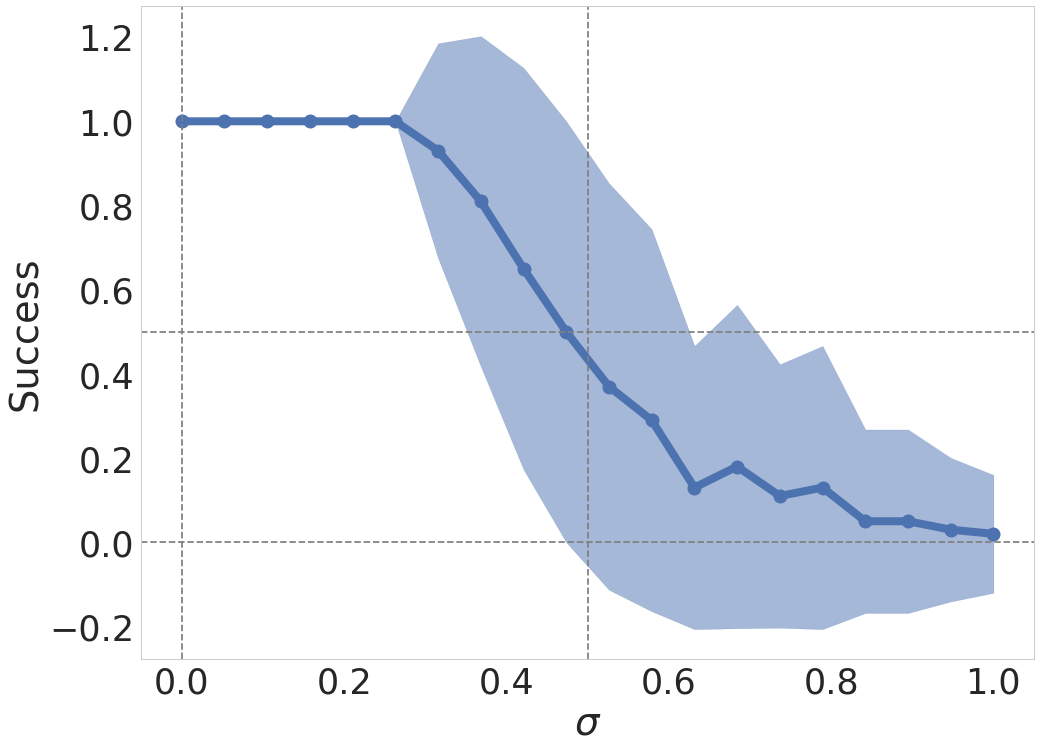

In [91]:
current_palette = sns.color_palette()
index = 0
ms = 14
lw = 8
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

mean_success = np.mean(successes, axis=1)
std = np.std(successes, axis=1)

ax.plot(sigma_vector, mean_success, 'o-', color=current_palette[index], lw=lw, ms=ms)
ax.fill_between(sigma_vector, mean_success - std, mean_success + std,
                color=current_palette[index], alpha=alpha)

ax.set_xlabel(r'$\sigma$')
ax.set_ylabel('Success')

ax.axhline(0, ls='--', color='gray')
ax.axhline(0.5, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray');
ax.axvline(0.5, ls='--', color='gray');

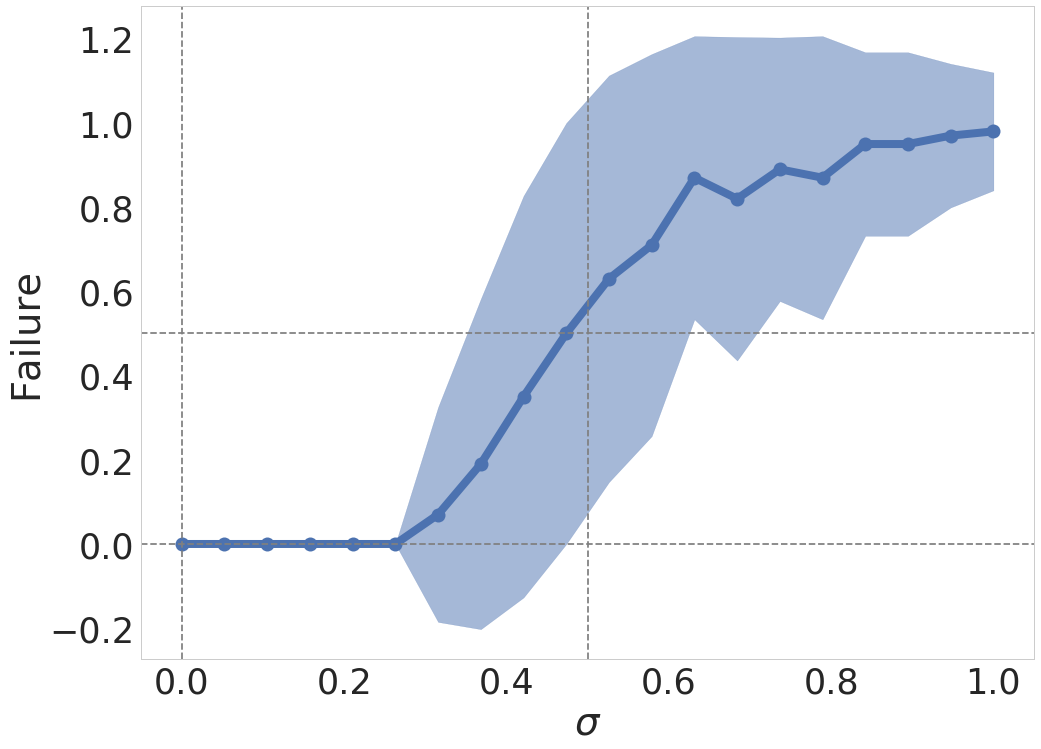

In [92]:
current_palette = sns.color_palette()
index = 0
ms = 14
lw = 8
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
failure = 1 - successes
mean_failure = np.mean(failure, axis=1)
std = np.std(failure, axis=1)

ax.plot(sigma_vector, mean_failure, 'o-', color=current_palette[index], lw=lw, ms=ms)
ax.fill_between(sigma_vector, mean_failure - std, mean_failure + std,
                color=current_palette[index], alpha=alpha)

ax.set_xlabel(r'$\sigma$')
ax.set_ylabel('Failure')

ax.axhline(0, ls='--', color='gray')
ax.axhline(0.5, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray');
ax.axvline(0.5, ls='--', color='gray');

In [ ]:
P = 'success for the whole sequence'
x = 'success at a chain'
E(P) = E(xi * xj * ... * xk)
E(P) = E(x) ^ transtions   
E(P) ^ (1 /transitions ) = E(x)
x^ 2 = y
x = sqrt(y)**

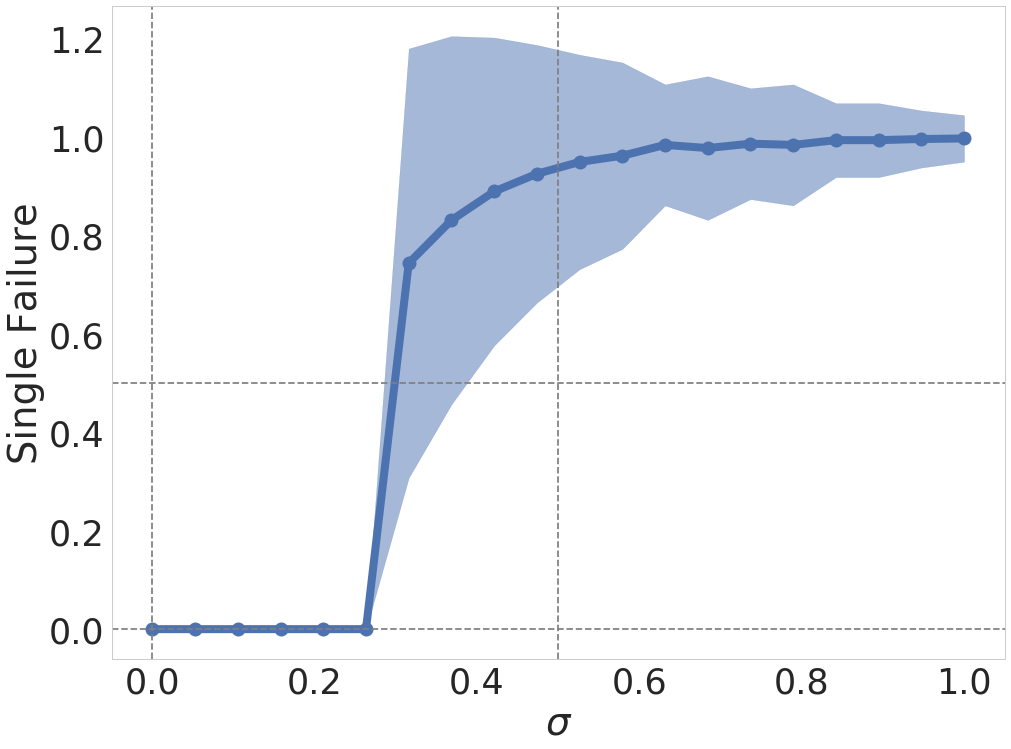

In [94]:
current_palette = sns.color_palette()
index = 0
ms = 14
lw = 8
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

n_root = n_patterns - 1
single_failure = np.power(mean_failure, 1.0 / n_root)
var_failure = np.var(failure, axis=1)
var_single = np.power(var_failure + np.power(single_failure, 2 * n_root), 1.0 / n_root) - single_failure ** 2
std_single = np.sqrt(var_single)

ax.plot(sigma_vector, single_failure, 'o-', color=current_palette[index], lw=lw, ms=ms)
ax.fill_between(sigma_vector, single_failure - std_single, single_failure + std_single,
                color=current_palette[index], alpha=alpha)

ax.set_xlabel(r'$\sigma$')
ax.set_ylabel('Single Failure')

ax.axhline(0, ls='--', color='gray')
ax.axhline(0.5, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray');
ax.axvline(0.5, ls='--', color='gray');

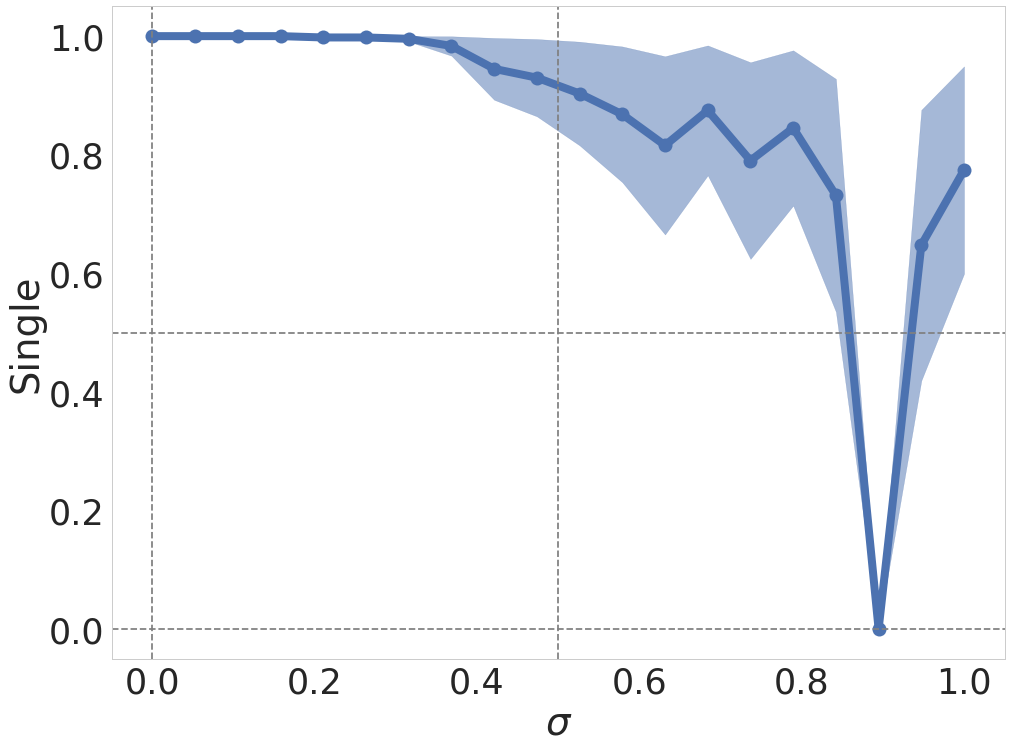

In [88]:
current_palette = sns.color_palette()
index = 0
ms = 14
lw = 8
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

n_root = n_patterns - 1
single_success = np.power(mean_success, 1.0 / n_root)
var_success = np.var(successes, axis=1)
std_single = np.power(var_success + np.power(single_success, 2 * n_root), 1.0 / n_root) - single_success ** 2

ax.plot(sigma_vector, single_success, 'o-', color=current_palette[index], lw=lw, ms=ms)
ax.fill_between(sigma_vector, single_success - std_single, single_success + std_single,
                color=current_palette[index], alpha=alpha)

ax.set_xlabel(r'$\sigma$')
ax.set_ylabel('Single Success')

ax.axhline(0, ls='--', color='gray')
ax.axhline(0.5, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray');
ax.axvline(0.5, ls='--', color='gray');

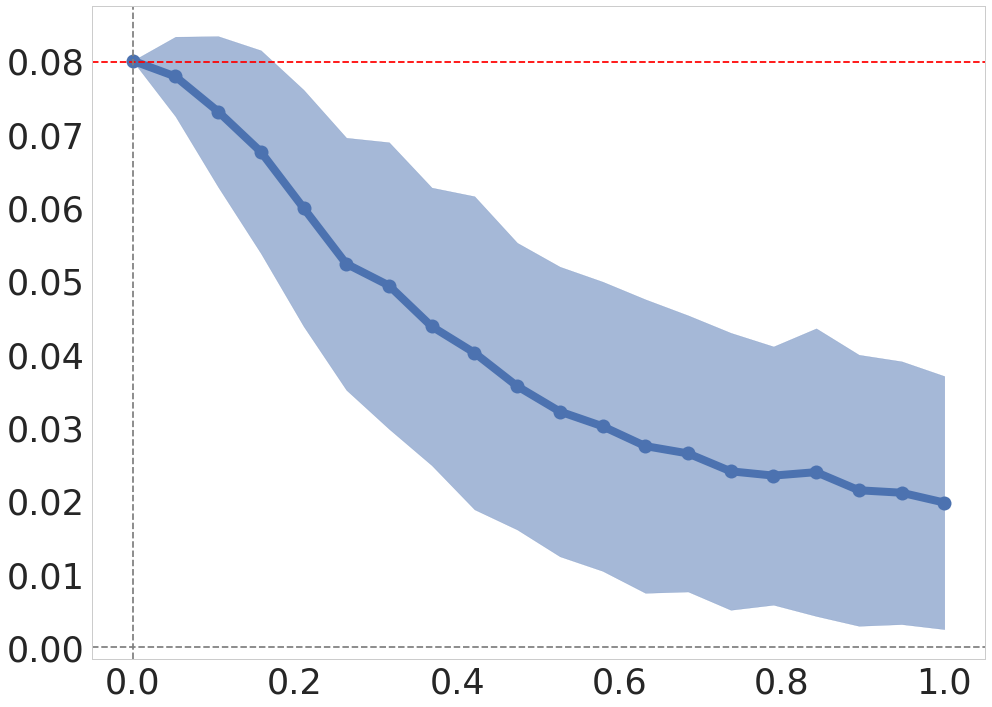

In [89]:
persistence_times_m = np.ma.masked_less_equal(persistence_times, 0.0)

pt_mean = np.mean(persistence_times, axis=(1, 2))
pt_std = np.std(persistence_times, axis=(1, 2))

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(sigma_vector, pt_mean, 'o-', color=current_palette[index], lw=lw, ms=ms)
ax.fill_between(sigma_vector, pt_mean - pt_std, pt_mean + pt_std,
                color=current_palette[index], alpha=alpha);

ax.axhline(0, ls='--', color='gray')
ax.axhline(T_persistence, ls='--', color='red')
ax.axvline(0, ls='--', color='gray');

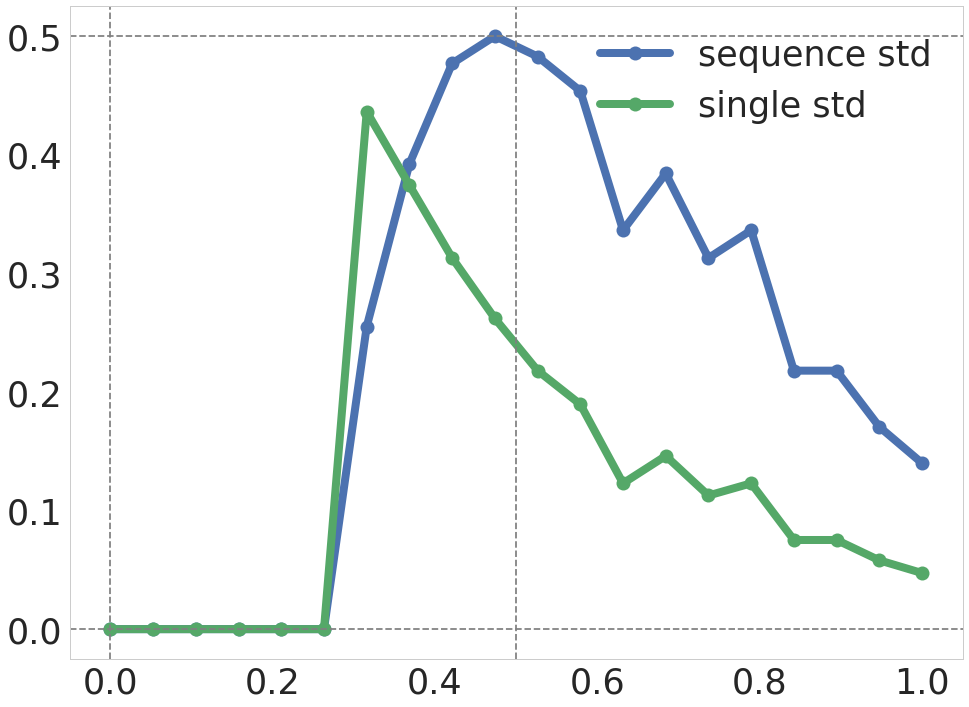

In [99]:
current_palette = sns.color_palette()
index = 0
ms = 14
lw = 8
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

failure = 1 - successes
mean_failure = np.mean(failure, axis=1)
std = np.std(failure, axis=1)

n_root = n_patterns - 1
single_failure = np.power(mean_failure, 1.0 / n_root)
var_failure = np.var(failure, axis=1)
var_single = np.power(var_failure + np.power(single_failure, 2 * n_root), 1.0 / n_root) - single_failure ** 2
std_single = np.sqrt(var_single)

ax.plot(sigma_vector, std, 'o-', color=current_palette[index], lw=lw, ms=ms, label='sequence std')
ax.plot(sigma_vector, std_single, 'o-', color=current_palette[index + 1], lw=lw, ms=ms, label='single std')

ax.axhline(0, ls='--', color='gray')
ax.axhline(0.5, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')
ax.axvline(0.5, ls='--', color='gray')

ax.legend();

#### Tau_a

In [100]:
%%time
always_learning = False
strict_maximum = True
perfect = False
z_transfer = False
k_perfect = True
diagonal_zero = False
normalized_currents = True

g_w_ampa = 1.0
g_w = 0.0
g_a = 1.0
tau_a = 0.150
G = 1.0
sigma = 0.0
tau_m = 0.010
tau_z_pre_ampa = 0.050
tau_z_post_ampa = 0.025
tau_p = 10.0

hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o']

# Recall
T_cue = 0.020
T_recall = 1.0 + T_cue
remove = 0.009

factor = 0.0

# Protocol
matrix = create_orthogonal_canonical_representation(minicolumns, hypercolumns)
seq = matrix[:n_patterns]
nr = build_network_representation(seq, minicolumns, hypercolumns)

n_connections = len(seq) - 1
value = 1.0
extension = 3
alpha = 0.5
weights = [value for i in range(n_connections)]
weights_collection = [weights]
sequences = [seq]
w = create_matrix_from_sequences_representation(minicolumns, hypercolumns, sequences, weights_collection,
                                                extension, alpha, w_min=-10.0)

# Neural Network
nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, tau_m=tau_m,
                  sigma=sigma, G=G, tau_z_pre_ampa=tau_z_pre_ampa, tau_z_post_ampa=tau_z_post_ampa, tau_p=tau_p,
                  z_transfer=z_transfer, diagonal_zero=diagonal_zero, strict_maximum=strict_maximum, 
                  perfect=perfect, k_perfect=k_perfect, always_learning=always_learning, 
                  normalized_currents=normalized_currents)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)


nn.w_ampa = w
aux, indexes = np.unique(nr, axis=0, return_index=True)
patterns_dic = {index:pattern for (index, pattern) in zip(indexes, aux)}
manager.patterns_dic = patterns_dic

# T persistence
w_tran = w[1, 1] - w[2, 1]

# Set the noise
w_robust = w[1, 1] - w[3, 1]
current = 2  * g_w_ampa * w_robust

# Noise
num = 30
trials = 100
sigma_vector = np.linspace(0, 1.0, num=num)

tau_a_list = [0.050, 0.100, 0.150]
success_list = []
persistent_time_list = []
theo_persistent = []

for tau_a in tau_a_list:
    nn.tau_a = tau_a

    successes = np.zeros((num, trials))
    persistence_times = np.zeros((num, trials, n_patterns - 2))

    T_persistence = calculate_T_persistence(tau_a, g_w_ampa, w_tran, g_a, tau_m, perfect=perfect)
    T_recall = 1.2 * T_persistence * n_patterns + T_cue
    theo_persistent.append(T_persistence)

    for sigma_index, factor in enumerate(sigma_vector):
        noise = factor * current
        nn.sigma = noise
        for trial_index in range(trials):
            aux = calculate_recall_success_nr(manager, nr, T_recall, T_cue, debug=True, remove=remove)
            s, timings, pattern_sequence = aux
            times = [t[1] for t in timings[1:-1]]
            n_aux = min((len(times), n_patterns - 2))
            successes[sigma_index, trial_index] = s
            persistence_times[sigma_index, trial_index, :n_aux] = np.array(times)[:n_aux]
            
    success_list.append(successes)
    persistent_time_list.append(persistence_times)

CPU times: user 30min 44s, sys: 2.08 s, total: 30min 46s
Wall time: 30min 46s


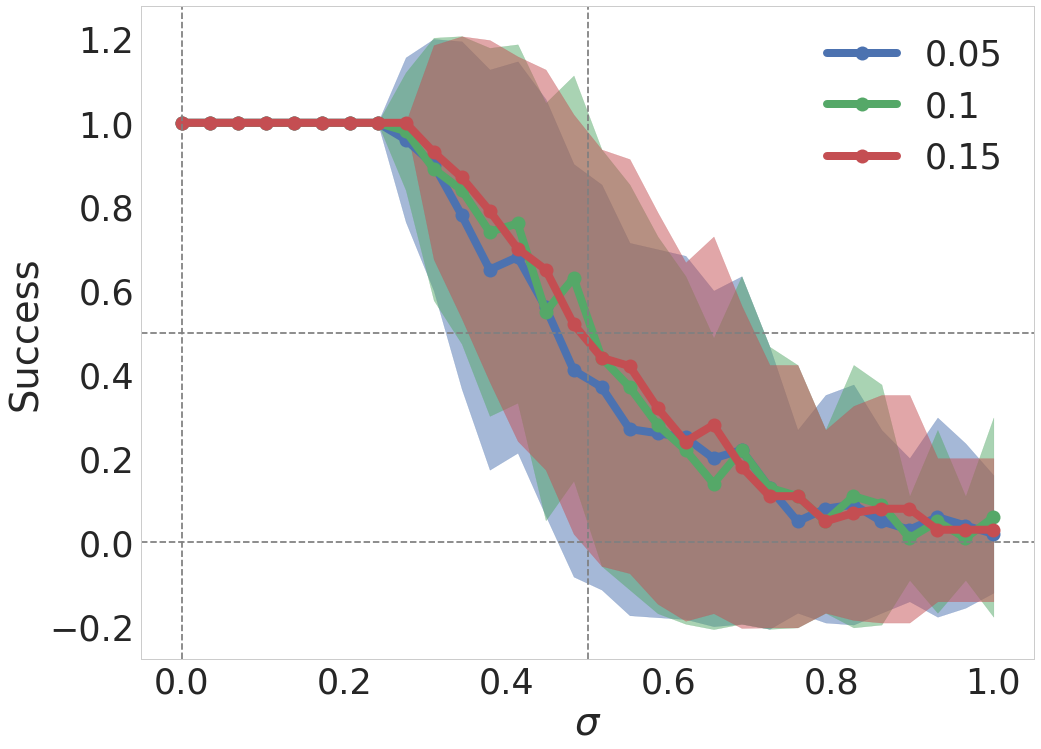

In [101]:
current_palette = sns.color_palette()
index = 0
ms = 14
lw = 8
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

for index, successes in enumerate(success_list):

    mean_success = np.mean(successes, axis=1)
    std = np.std(successes, axis=1)
    std_m = np.std(successes_m, axis=1)
   
    ax.plot(sigma_vector, mean_success, 'o-', color=current_palette[index], lw=lw, ms=ms, label=tau_a_list[index])

    ax.fill_between(sigma_vector, mean_success - std, mean_success + std,
                    color=current_palette[index], alpha=alpha)

ax.set_xlabel(r'$\sigma$')
ax.set_ylabel('Success')

ax.legend();
ax.axhline(0, ls='--', color='gray')
ax.axhline(0.5, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray');
ax.axvline(0.5, ls='--', color='gray');

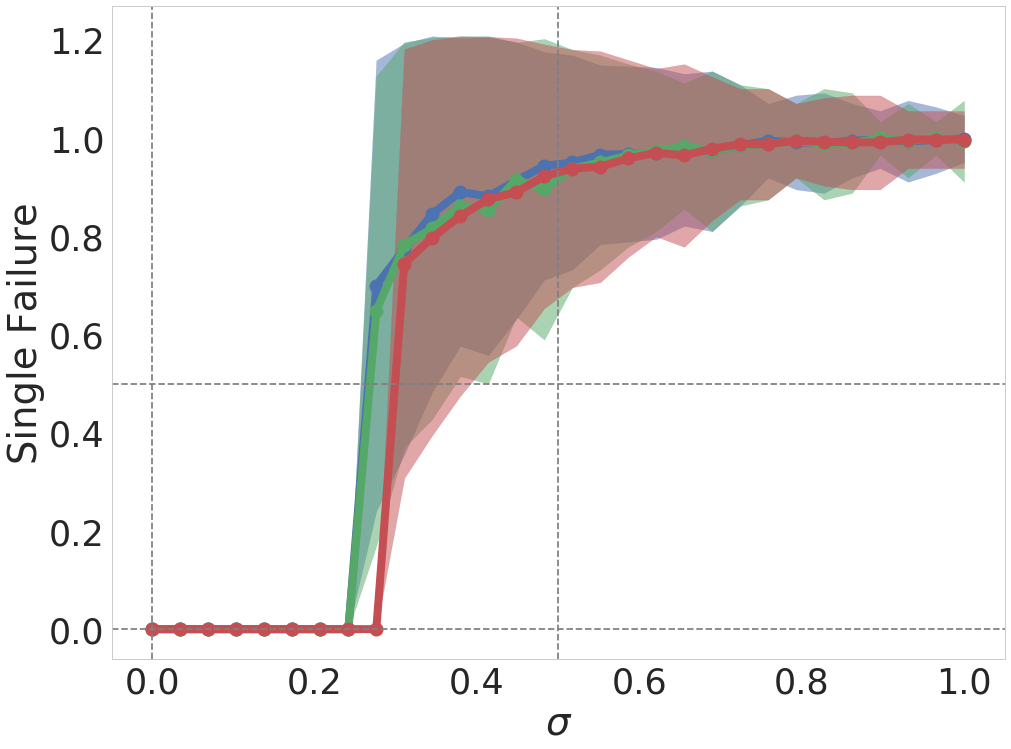

In [102]:
current_palette = sns.color_palette()
index = 0
ms = 14
lw = 8
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

for index, successes in enumerate(success_list):
    n_root = n_patterns - 1
    failure = 1 - successes
    mean_failure = np.mean(failure, axis=1)
    single_failure = np.power(mean_failure, 1.0 / n_root)
    var_failure = np.var(failure, axis=1)
    var_single = np.power(var_failure + np.power(single_failure, 2 * n_root), 1.0 / n_root) - single_failure ** 2
    std_single = np.sqrt(var_single)

    ax.plot(sigma_vector, single_failure, 'o-', color=current_palette[index], 
            lw=lw, ms=ms, label=tau_a_list[index])
    ax.fill_between(sigma_vector, single_failure - std_single, single_failure + std_single,
                    color=current_palette[index], alpha=alpha)

ax.set_xlabel(r'$\sigma$')
ax.set_ylabel('Single Failure')

ax.set_title(r'Dependence on $\tau_a$')
ax.legend()
ax.axhline(0, ls='--', color='gray')
ax.axhline(0.5, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray');
ax.axvline(0.5, ls='--', color='gray');

The single failure seems to depend a litle bit on tau_a. But this is good, I want to make tau_a big so the separation of time scales is better and then control the time with g_a

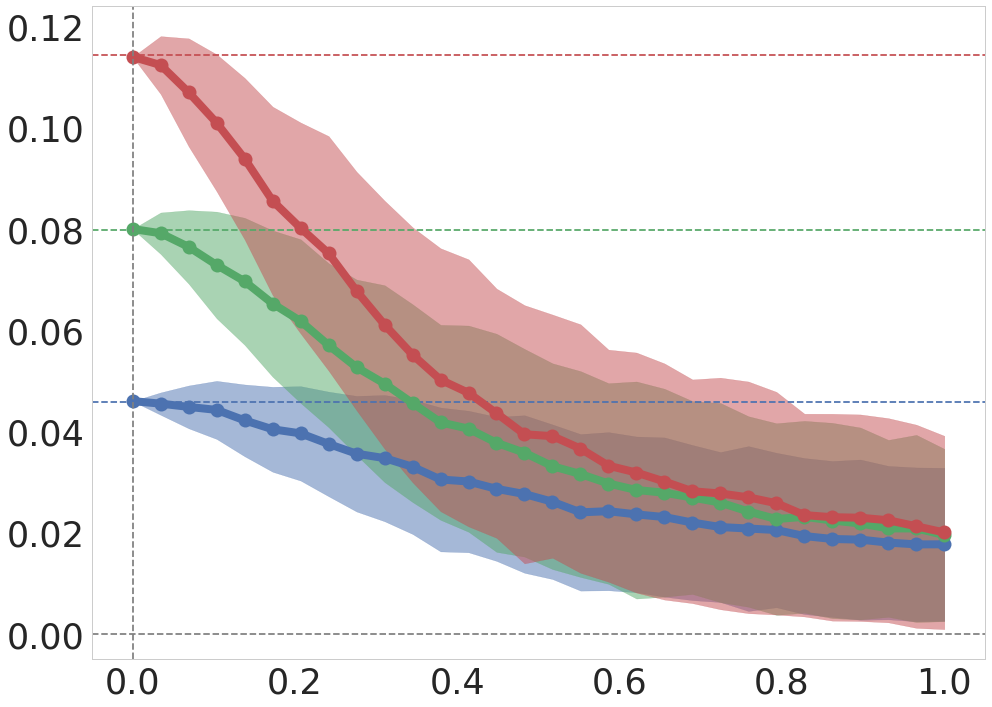

In [103]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

for index, persistence_times in enumerate(persistent_time_list):
    persistence_times_m = np.ma.masked_less_equal(persistence_times, 0.0)

    pt_mean = np.mean(persistence_times, axis=(1, 2))
    pt_std = np.std(persistence_times, axis=(1, 2))
    ax.plot(sigma_vector, pt_mean, 'o-', color=current_palette[index], lw=lw, ms=ms)
    ax.fill_between(sigma_vector, pt_mean - pt_std, pt_mean + pt_std,
                    color=current_palette[index], alpha=alpha)
    
    ax.axhline(theo_persistent[index], ls='--', color=current_palette[index])


ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray');

#### Persistence time

In [104]:
%%time
always_learning = False
strict_maximum = True
perfect = False
z_transfer = False
k_perfect = True
diagonal_zero = False
normalized_currents = True

g_w_ampa = 1.0
g_w = 0.0
g_a = 1.0
tau_a = 0.150
G = 1.0
sigma = 0.0
tau_m = 0.010
tau_z_pre_ampa = 0.050
tau_z_post_ampa = 0.025
tau_p = 10.0

hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o']

# Recall
T_cue = 0.020
T_recall = 1.0 + T_cue
remove = 0.009

factor = 0.0

# Protocol
matrix = create_orthogonal_canonical_representation(minicolumns, hypercolumns)
seq = matrix[:n_patterns]
nr = build_network_representation(seq, minicolumns, hypercolumns)

n_connections = len(seq) - 1
value = 1.0
extension = 3
alpha = 0.5
weights = [value for i in range(n_connections)]
weights_collection = [weights]
sequences = [seq]
w = create_matrix_from_sequences_representation(minicolumns, hypercolumns, sequences, weights_collection,
                                                extension, alpha, w_min=-10.0)

# Neural Network
nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, tau_m=tau_m,
                  sigma=sigma, G=G, tau_z_pre_ampa=tau_z_pre_ampa, tau_z_post_ampa=tau_z_post_ampa, tau_p=tau_p,
                  z_transfer=z_transfer, diagonal_zero=diagonal_zero, strict_maximum=strict_maximum, 
                  perfect=perfect, k_perfect=k_perfect, always_learning=always_learning, 
                  normalized_currents=normalized_currents)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)


nn.w_ampa = w
aux, indexes = np.unique(nr, axis=0, return_index=True)
patterns_dic = {index:pattern for (index, pattern) in zip(indexes, aux)}
manager.patterns_dic = patterns_dic

# T persistence
w_tran = w[1, 1] - w[2, 1]

# Set the noise
w_robust = w[1, 1] - w[3, 1]
current = 2  * g_w_ampa * w_robust

# Noise
num = 30
trials = 100
sigma_vector = np.linspace(0, 1.0, num=num)

T_persistence_list = [0.025, 0.80, 0.200, 0.500]
r = tau_m / tau_a
f = 1 - r
B_list = [1 - (1/f) * np.exp(-T / tau_a) for T in T_persistence_list]
success_list = []
g_list = []
theo_persistent = []
persistent_time_list = []

for B in B_list:
    g_a = g_w_ampa * w_tran / B
    g_w_ampa_a = g_w_ampa * w_tran / B
    g_list.append(g_a)

    successes = np.zeros((num, trials))
    persistence_times = np.zeros((num, trials, n_patterns - 2))

    T_persistence = calculate_T_persistence(tau_a, g_w_ampa, w_tran, g_a, tau_m, perfect=perfect)
    T_recall = 1.2 * T_persistence * n_patterns + T_cue
    theo_persistent.append(T_persistence)

    for sigma_index, factor in enumerate(sigma_vector):
        noise = factor * current
        nn.sigma = noise
        for trial_index in range(trials):
            aux = calculate_recall_success_nr(manager, nr, T_recall, T_cue, debug=True, remove=remove)
            s, timings, pattern_sequence = aux
            times = [t[1] for t in timings[1:-1]]
            n_aux = min((len(times), n_patterns - 2))
            successes[sigma_index, trial_index] = s
            persistence_times[sigma_index, trial_index, :n_aux] = np.array(times)[:n_aux]
            
    success_list.append(successes)
    persistent_time_list.append(persistence_times)

CPU times: user 3h 11min 19s, sys: 11.4 s, total: 3h 11min 31s
Wall time: 3h 11min 31s


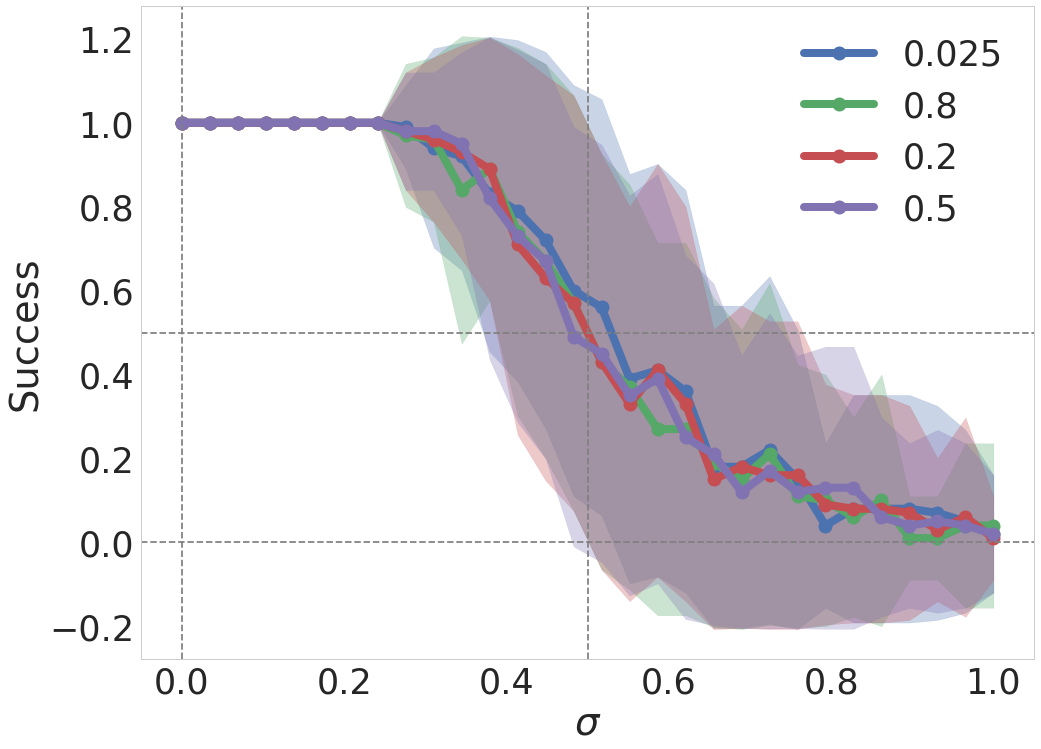

In [107]:
current_palette = sns.color_palette()
index = 0
ms = 14
lw = 8
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
alpha = 0.3

for index, successes in enumerate(success_list):

    mean_success = np.mean(successes, axis=1)
    std = np.std(successes, axis=1)
    std_m = np.std(successes_m, axis=1)
   
    ax.plot(sigma_vector, mean_success, 'o-', color=current_palette[index], lw=lw, ms=ms, label=T_persistence_list[index])

    ax.fill_between(sigma_vector, mean_success - std, mean_success + std,
                    color=current_palette[index], alpha=alpha)

ax.set_xlabel(r'$\sigma$')
ax.set_ylabel('Success')

ax.legend();
ax.axhline(0, ls='--', color='gray')
ax.axhline(0.5, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray');
ax.axvline(0.5, ls='--', color='gray');

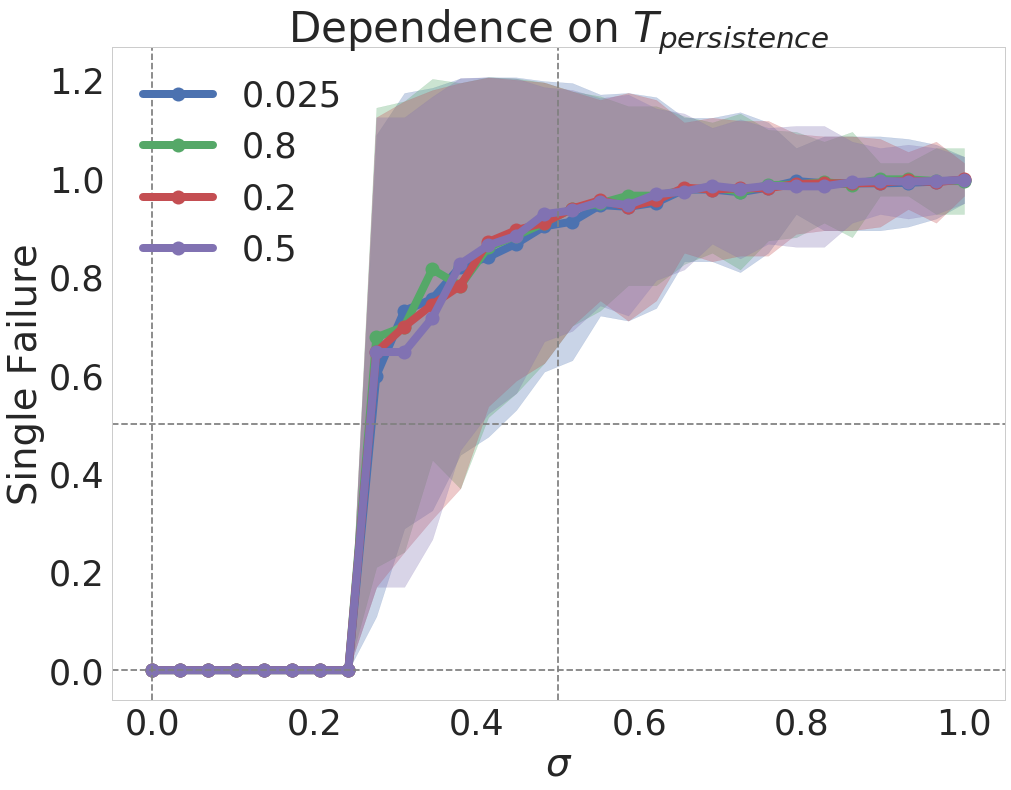

In [110]:
current_palette = sns.color_palette()
index = 0
ms = 14
lw = 8
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

for index, successes in enumerate(success_list):
    n_root = n_patterns - 1
    failure = 1 - successes
    mean_failure = np.mean(failure, axis=1)
    single_failure = np.power(mean_failure, 1.0 / n_root)
    var_failure = np.var(failure, axis=1)
    var_single = np.power(var_failure + np.power(single_failure, 2 * n_root), 1.0 / n_root) - single_failure ** 2
    std_single = np.sqrt(var_single)

    ax.plot(sigma_vector, single_failure, 'o-', color=current_palette[index], 
            lw=lw, ms=ms, label=T_persistence_list[index])
    ax.fill_between(sigma_vector, single_failure - std_single, single_failure + std_single,
                    color=current_palette[index], alpha=alpha)

ax.set_xlabel(r'$\sigma$')
ax.set_ylabel('Single Failure')

ax.set_title(r'Dependence on $T_{persistence}$')
ax.legend()
ax.axhline(0, ls='--', color='gray')
ax.axhline(0.5, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray');
ax.axvline(0.5, ls='--', color='gray');

0
1
2
3


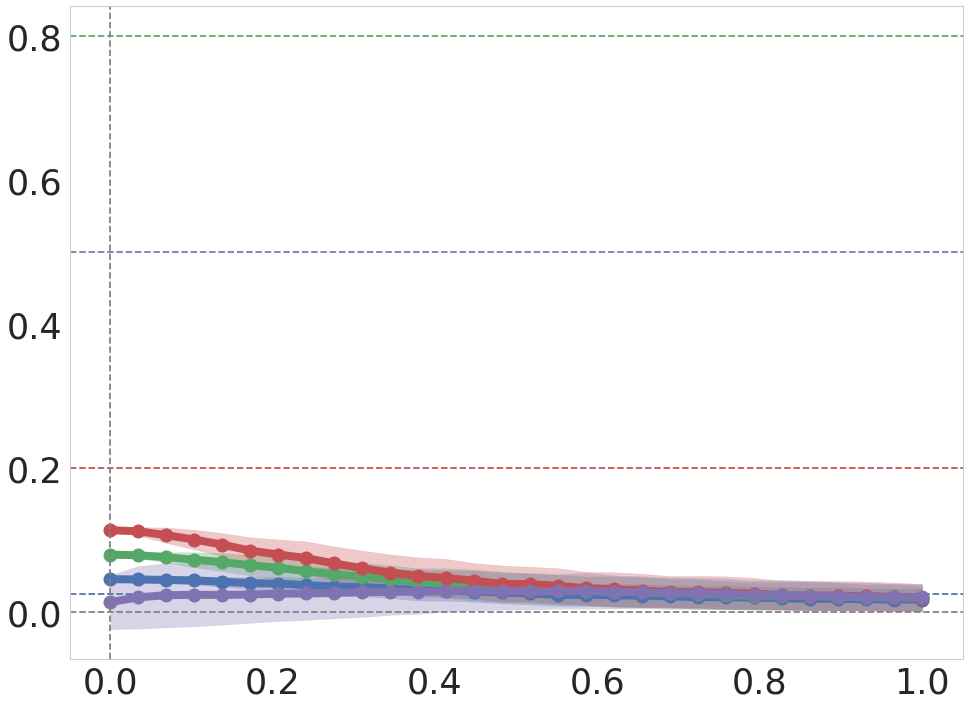

In [119]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

for index, persistence_times in enumerate(persistent_time_list[:4]):
    print(index)
    persistence_times_m = np.ma.masked_less_equal(persistence_times, 0.0)

    pt_mean = np.mean(persistence_times, axis=(1, 2))
    pt_std = np.std(persistence_times, axis=(1, 2))
    ax.plot(sigma_vector, pt_mean, 'o-', color=current_palette[index], lw=lw, ms=ms)
    ax.fill_between(sigma_vector, pt_mean - pt_std, pt_mean + pt_std,
                    color=current_palette[index], alpha=alpha)
    
    ax.axhline(theo_persistent[index], ls='--', color=current_palette[index])


ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray');

## Scale
I want to see wehther the single probability depend on the size of the sequence

In [153]:
%%time
always_learning = False
strict_maximum = True
perfect = False
z_transfer = False
k_perfect = True
diagonal_zero = False
normalized_currents = True

g_w_ampa = 1.0
g_w = 0.0
g_a = 1.0
tau_a = 0.150
G = 1.0
sigma = 0.0
tau_m = 0.010
tau_z_pre_ampa = 0.050
tau_z_post_ampa = 0.025
tau_p = 10.0

hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o']

# Recall
T_cue = 0.020

# Simulation
success_list = []
n_patterns_list = [10, 20, 50, 100]
theo_persistent = []
persistent_time_list = []

# Noise
num = 35
trials = 50
sigma_vector = np.linspace(0, 1.0, num=num)

for n_patterns in n_patterns_list:
    minicolumns = n_patterns

    # Protocol
    matrix = create_orthogonal_canonical_representation(minicolumns, hypercolumns)
    seq = matrix[:n_patterns]
    nr = build_network_representation(seq, minicolumns, hypercolumns)

    n_connections = len(seq) - 1
    value = 1.0
    extension = 3
    alpha = 0.5
    weights = [value for i in range(n_connections)]
    weights_collection = [weights]
    sequences = [seq]
    w = create_matrix_from_sequences_representation(minicolumns, hypercolumns, sequences, weights_collection,
                                                    extension, alpha, w_min=-10.0)


    # Neural Network
    nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, tau_m=tau_m,
                      sigma=sigma, G=G, tau_z_pre_ampa=tau_z_pre_ampa, tau_z_post_ampa=tau_z_post_ampa, tau_p=tau_p,
                      z_transfer=z_transfer, diagonal_zero=diagonal_zero, strict_maximum=strict_maximum, 
                      perfect=perfect, k_perfect=k_perfect, always_learning=always_learning, 
                      normalized_currents=normalized_currents)

    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)


    nn.w_ampa = w
    aux, indexes = np.unique(nr, axis=0, return_index=True)
    patterns_dic = {index:pattern for (index, pattern) in zip(indexes, aux)}
    manager.patterns_dic = patterns_dic

    # T persistence
    w_tran = w[1, 1] - w[2, 1]

    # Set the noise
    w_robust = w[1, 1] - w[3, 1]
    current = 1  * g_w_ampa * w_robust


    T_persistence = 0.040
    r = tau_m / tau_a
    f = 1 - r
    B = 1 - (1/f) * np.exp(-T_persistence / tau_a)



    g_a = g_w_ampa * w_tran / B
    g_w_ampa_a = g_w_ampa * w_tran / B

    successes = np.zeros((num, trials))
    persistence_times = np.zeros((num, trials, n_patterns - 2))

    T_persistence = calculate_T_persistence(tau_a, g_w_ampa, w_tran, g_a, tau_m, perfect=perfect)
    T_recall = 1.5 * T_persistence * n_patterns + T_cue
    theo_persistent.append(T_persistence)

    for sigma_index, factor in enumerate(sigma_vector):
        noise = factor * current
        nn.sigma = noise
        for trial_index in range(trials):
            aux = calculate_recall_success_nr(manager, nr, T_recall, T_cue, debug=True, remove=remove)
            s, timings, pattern_sequence = aux
            times = [t[1] for t in timings[1:-1]]
            n_aux = min((len(times), n_patterns - 2))
            successes[sigma_index, trial_index] = s
            persistence_times[sigma_index, trial_index, :n_aux] = np.array(times)[:n_aux]
            
    success_list.append(successes)
    persistent_time_list.append(persistence_times)

CPU times: user 7h 30min 13s, sys: 5min 42s, total: 7h 35min 56s
Wall time: 5h 10min 17s


In [154]:
n_patterns = 100
T_recall = 1.5 * T_persistence * n_patterns + T_cue
T_recall


6.0199999999999996

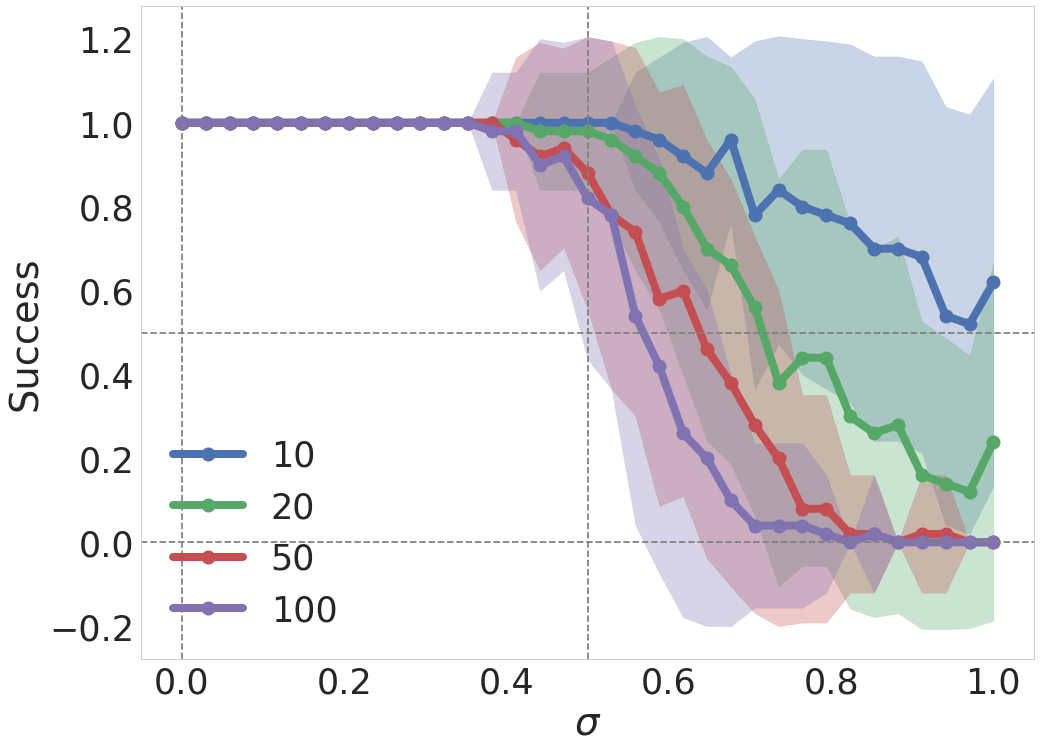

In [155]:
current_palette = sns.color_palette()
index = 0
ms = 14
lw = 8
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
alpha = 0.3

for index, successes in enumerate(success_list):

    mean_success = np.mean(successes, axis=1)
    std = np.std(successes, axis=1)
    std_m = np.std(successes_m, axis=1)
   
    ax.plot(sigma_vector, mean_success, 'o-', color=current_palette[index], lw=lw, ms=ms, 
            label=n_patterns_list[index])

    ax.fill_between(sigma_vector, mean_success - std, mean_success + std,
                    color=current_palette[index], alpha=alpha)

ax.set_xlabel(r'$\sigma$')
ax.set_ylabel('Success')

ax.legend();
ax.axhline(0, ls='--', color='gray')
ax.axhline(0.5, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray');
ax.axvline(0.5, ls='--', color='gray');

10
20
50
100


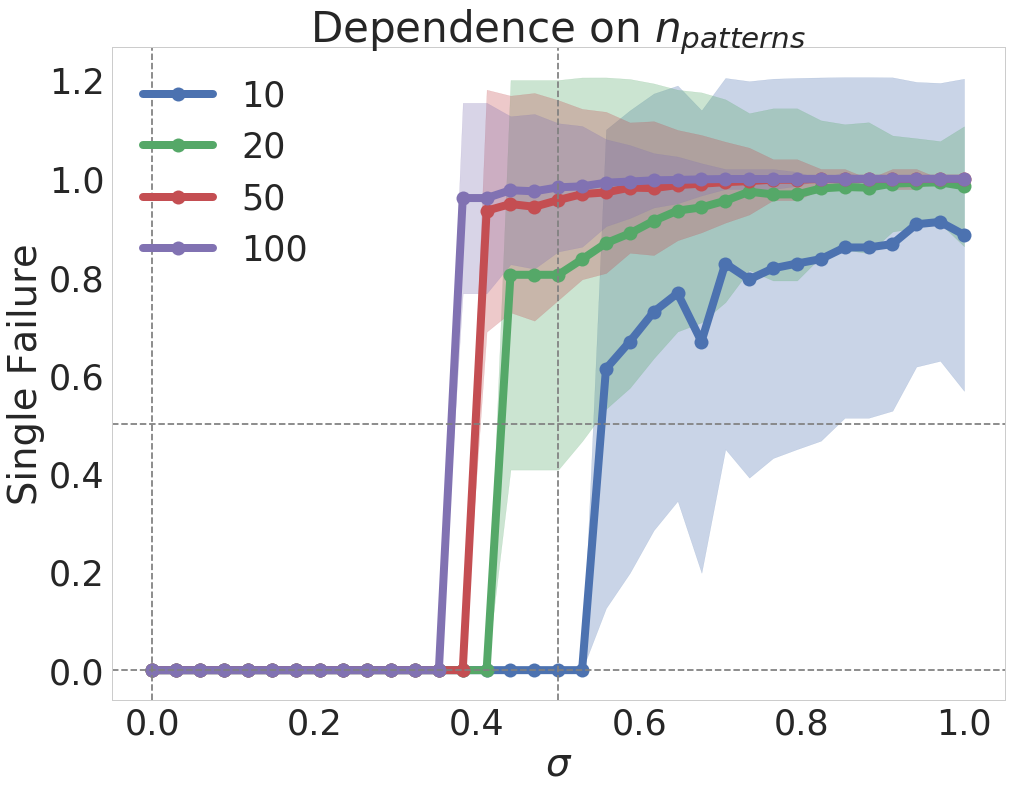

In [156]:
current_palette = sns.color_palette()
index = 0
ms = 14
lw = 8
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

for index, successes in enumerate(success_list):
    n_patterns = n_patterns_list[index]
    print(n_patterns)
    n_root = n_patterns - 2
    failure = 1 - successes
    mean_failure = np.mean(failure, axis=1)
    single_failure = np.power(mean_failure, 1.0 / n_root)
    var_failure = np.var(failure, axis=1)
    var_single = np.power(var_failure + np.power(single_failure, 2 * n_root), 1.0 / n_root) - single_failure ** 2
    std_single = np.sqrt(var_single)

    ax.plot(sigma_vector, single_failure, 'o-', color=current_palette[index], 
            lw=lw, ms=ms, label=n_patterns_list[index])
    ax.fill_between(sigma_vector, single_failure - std_single, single_failure + std_single,
                    color=current_palette[index], alpha=alpha)

ax.set_xlabel(r'$\sigma$')
ax.set_ylabel('Single Failure')

ax.set_title(r'Dependence on $n_{patterns}$')
ax.legend()
ax.axhline(0, ls='--', color='gray')
ax.axhline(0.5, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray');
ax.axvline(0.5, ls='--', color='gray');

0
1
2
3


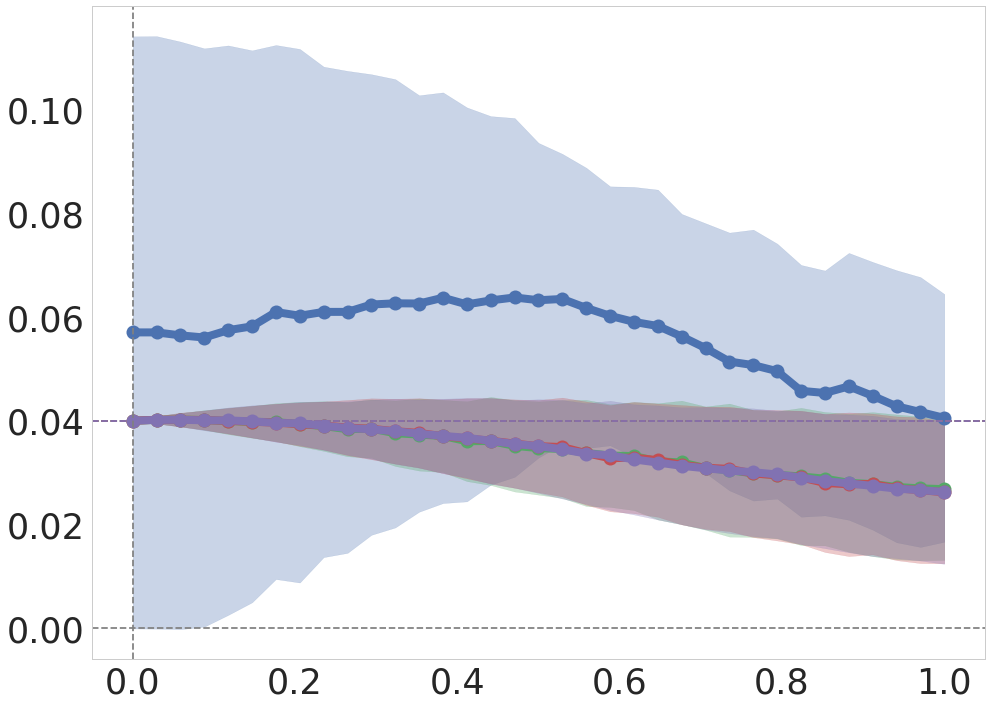

In [157]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

for index, persistence_times in enumerate(persistent_time_list[:4]):
    print(index)
    persistence_times_m = np.ma.masked_less_equal(persistence_times, 0.0)

    pt_mean = np.mean(persistence_times, axis=(1, 2))
    pt_std = np.std(persistence_times, axis=(1, 2))
    ax.plot(sigma_vector, pt_mean, 'o-', color=current_palette[index], lw=lw, ms=ms)
    ax.fill_between(sigma_vector, pt_mean - pt_std, pt_mean + pt_std,
                    color=current_palette[index], alpha=alpha)
    
    ax.axhline(theo_persistent[index], ls='--', color=current_palette[index])


ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray');

In [159]:
success_list
persistent_time_list

[array([[[ 0.114,  0.114,  0.114, ...,  0.   ,  0.   ,  0.   ],
         [ 0.114,  0.114,  0.114, ...,  0.   ,  0.   ,  0.   ],
         [ 0.114,  0.114,  0.114, ...,  0.   ,  0.   ,  0.   ],
         ..., 
         [ 0.114,  0.114,  0.114, ...,  0.   ,  0.   ,  0.   ],
         [ 0.114,  0.114,  0.114, ...,  0.   ,  0.   ,  0.   ],
         [ 0.114,  0.114,  0.114, ...,  0.   ,  0.   ,  0.   ]],
 
        [[ 0.115,  0.115,  0.117, ...,  0.   ,  0.   ,  0.   ],
         [ 0.111,  0.112,  0.115, ...,  0.   ,  0.   ,  0.   ],
         [ 0.114,  0.116,  0.111, ...,  0.   ,  0.   ,  0.   ],
         ..., 
         [ 0.115,  0.109,  0.111, ...,  0.   ,  0.   ,  0.   ],
         [ 0.114,  0.122,  0.11 , ...,  0.   ,  0.   ,  0.   ],
         [ 0.115,  0.112,  0.115, ...,  0.   ,  0.   ,  0.   ]],
 
        [[ 0.117,  0.111,  0.117, ...,  0.   ,  0.   ,  0.   ],
         [ 0.112,  0.108,  0.114, ...,  0.   ,  0.   ,  0.   ],
         [ 0.116,  0.115,  0.113, ...,  0.   ,  0.   ,  0.   ],
    

In [170]:
x = np.array(success_list)
#y = np.array(persistent_time_list)

In [171]:
np.save('/home/heberto/learning/BCPNN_sequences/success_big_n', x)
#np.save('/home/heberto/learning/BCPNN_sequences/persistent_big_n', y)

In [169]:
y.shape

NameError: name 'y' is not defined